## Python statistics essential training - 04_03_bootstrapping

Standard imports

In [1]:
import math
import io

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [5]:
pop = pd.read_csv('grades.csv')

In [6]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


<AxesSubplot:>

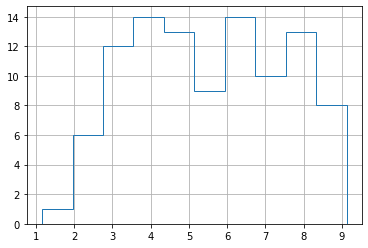

In [7]:
pop.grade.hist(histtype="step")

In [8]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [9]:
## this time we cannot build a confidence interval
## by simulating the sampling distribution because
## we do not know how to describe it

#### Bootstrapping Process:

- we draw grades randomly for our existing sample, with replacement
> <span style="color:indianred"> **NOTE**: this requires that the sample is representative </span>

In [10]:
pop.sample(100, replace=True).describe()

,grade
count,100.000000
mean,5.841995
std,1.865489
min,1.983167
25%,4.440745
50%,5.915592
75%,7.395195
max,9.120705


In [11]:
bootstrap = pd.DataFrame({'meangrade':[pop.sample(100, replace=True).grade.mean() for i in range(1000)]})

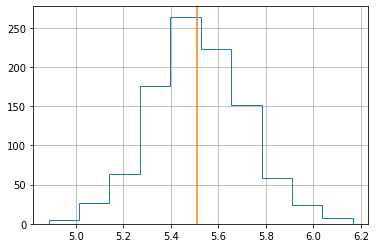

In [12]:
bootstrap.meangrade.hist(histtype='step')
plt.axvline(pop.grade.mean(), color='C1')

In [13]:
## bootstrap approximated 95% confidence interval for
## the mean grade:
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.128777294781299, 5.917853650422884)

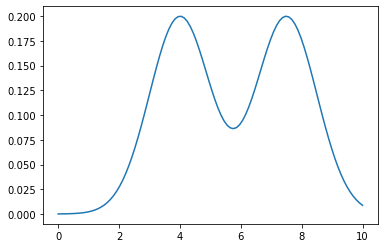

In [15]:
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x = np.linspace(0,10,100)
plt.plot(x,0.5*n1.pdf(x) + 0.5*n2.pdf(x))
plt.show()

In [22]:
## rvs = scipy.stats distribution object, which
## is used to turn a random sample from that distribution
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [23]:
draw()

2.927735597400332

In [24]:
def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

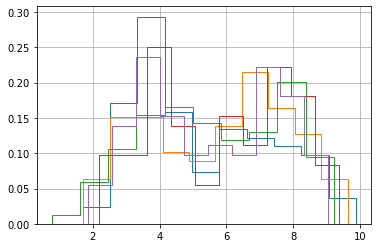

In [25]:
for i in range(5):
    dataset(100).grade.hist(histtype='step', density=True)

In [26]:
means = pd.DataFrame({'meangrade': [dataset(100).grade.mean() for i in range (1000)]})

<AxesSubplot:>

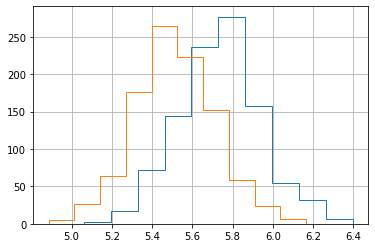

In [27]:
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')